# Linear and Polynomial Regression

## Exploratory Analysis

In [55]:
import pandas as pd
import financialanalysis as fa # 'pip install financialanalysis' in terminal if you don't have it

df = pd.read_csv('./TSLA.csv')
df.Date = pd.to_datetime(df.Date)
df.Date = fa.datetimeToFloatyear(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010.490411,3.800,5.000,3.508,4.778,4.778,93831500
1,2010.493151,5.158,6.084,4.660,4.766,4.766,85935500
2,2010.495890,5.000,5.184,4.054,4.392,4.392,41094000
3,2010.498630,4.600,4.620,3.742,3.840,3.840,25699000
4,2010.509589,4.000,4.000,3.166,3.222,3.222,34334500


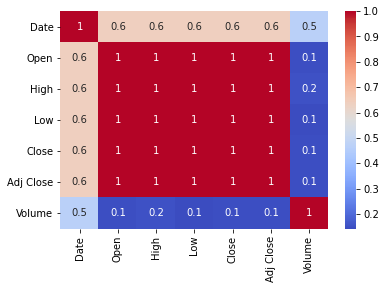

In [56]:
import seaborn as sns

sns.heatmap(df.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')

We can see that the open, close, high and low prices are highly correlated.

## Pairplot

Not sure how informative this is

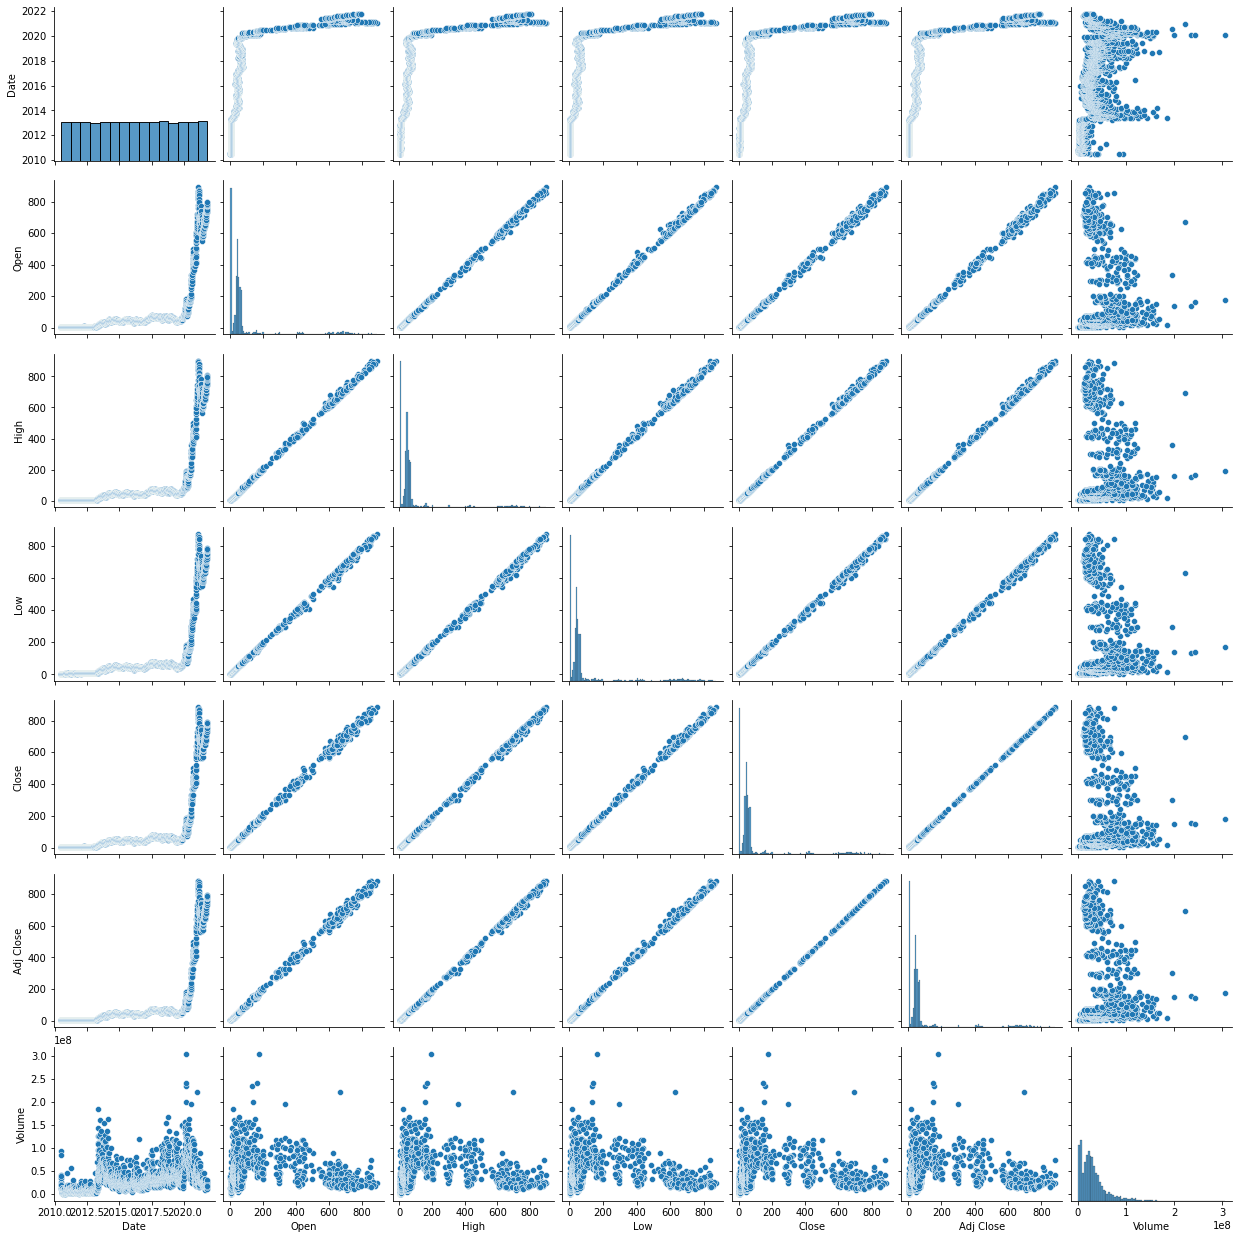

In [57]:
sns.pairplot(data=df, palette='winter')

## Linear and Polynomial Regression

### Splitting Dataset

In [58]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=21)

# Need to be sorted for polynomial regression to work properly
train = train.sort_values(by=['Date'])
test = test.sort_values(by=['Date'])
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010.490411,3.800,5.000,3.508,4.778,4.778,93831500
1,2010.493151,5.158,6.084,4.660,4.766,4.766,85935500
2,2010.495890,5.000,5.184,4.054,4.392,4.392,41094000
3,2010.498630,4.600,4.620,3.742,3.840,3.840,25699000
5,2010.512329,3.280,3.326,2.996,3.160,3.160,34608500


### Simple Linear Regression
Below is a simple linear regression model that predicts the closing price ``Close`` using the ``Date``.

Linear regression, testing Mean Squared Error: 0.5891


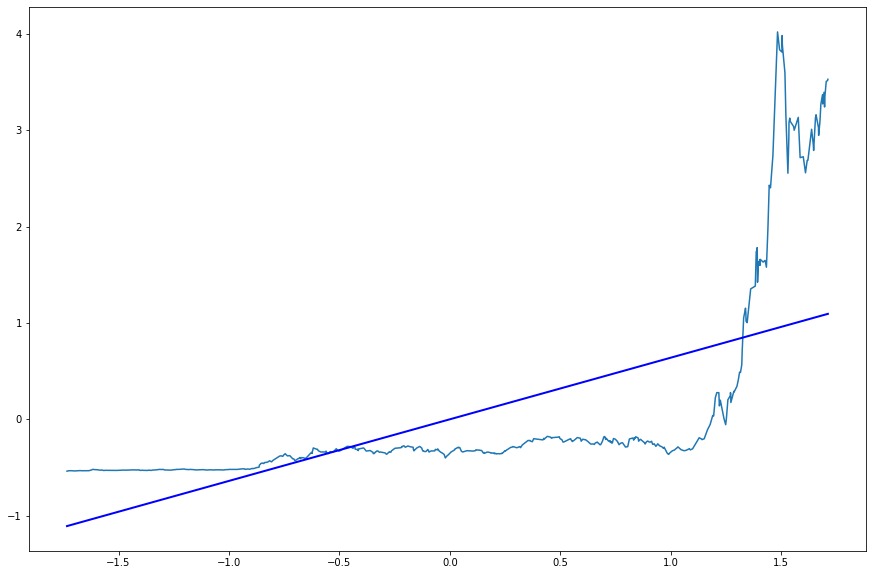

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X_train, X_test = train['Date'], test['Date']
y_train, y_test = train['Close'], test['Close']

# Reshape data (sklearn gets mad if I don't)
X_train = StandardScaler().fit_transform(X_train.values.reshape(-1,1))
y_train = StandardScaler().fit_transform(y_train.values.reshape(-1,1))
X_test = StandardScaler().fit_transform(X_test.values.reshape(-1,1))
y_test = StandardScaler().fit_transform(y_test.values.reshape(-1,1))

# Fit linear model, run, calc MSE
lin_model = LinearRegression().fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
print('Linear regression, testing Mean Squared Error: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(15,10))
plt.plot(X_test, y_test)
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

### Polynomial Regression (25 points)
Polynomial regression models that predicts ``Close`` with the ``Date``

Degree 2, training MSE: 0.33918 and testing MSE: 0.32282
Degree 3, training MSE: 0.16516 and testing MSE: 0.14752
Degree 4, training MSE: 0.09014 and testing MSE: 0.08427
Degree 5, training MSE: 0.08495 and testing MSE: 0.08229


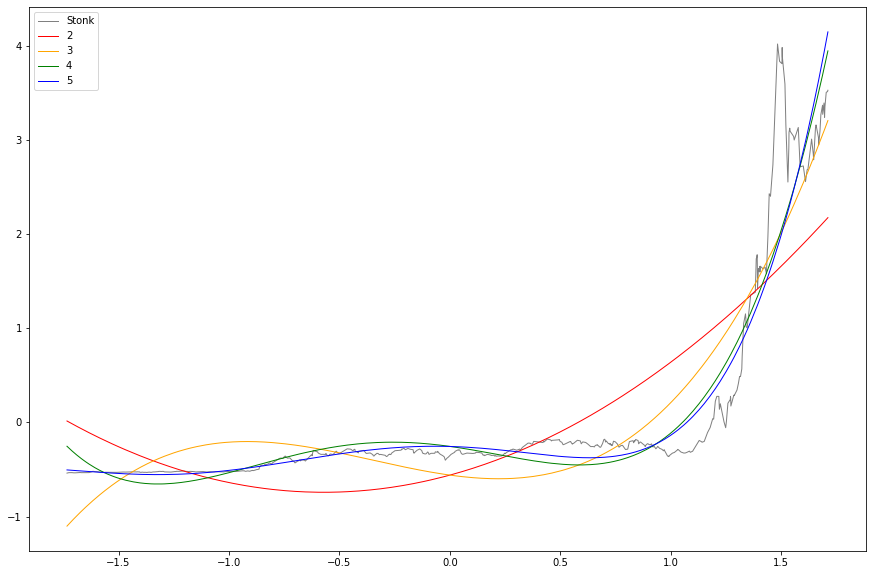

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Degree 2
polyreg = make_pipeline(PolynomialFeatures(2), StandardScaler(), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_train)
train2 = metrics.mean_squared_error(y_train, y_pred)
y_pred2 = polyreg.predict(X_test)
test2 = metrics.mean_squared_error(y_test, y_pred2)

# Degree 3
polyreg = make_pipeline(PolynomialFeatures(3), StandardScaler(), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_train)
train3 = metrics.mean_squared_error(y_train, y_pred)
y_pred3 = polyreg.predict(X_test)
test3 = metrics.mean_squared_error(y_test, y_pred3)

# Degree 4
polyreg = make_pipeline(PolynomialFeatures(4), StandardScaler(), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_train)
train4 = metrics.mean_squared_error(y_train, y_pred)
y_pred4 = polyreg.predict(X_test)
test4 = metrics.mean_squared_error(y_test, y_pred4)

# Degree 5
polyreg = make_pipeline(PolynomialFeatures(5), StandardScaler(), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_train)
train5 = metrics.mean_squared_error(y_train, y_pred)
y_pred5 = polyreg.predict(X_test)
test5 = metrics.mean_squared_error(y_test, y_pred5)

print('Degree 2, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train2, test2))
print('Degree 3, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train3, test3))
print('Degree 4, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train4, test4))
print('Degree 5, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train5, test5))

plt.figure(figsize=(15,10))
plt.plot(X_test, y_test, color='gray', linewidth=1)
plt.plot(X_test, y_pred2, color='red', linewidth=1)
plt.plot(X_test, y_pred3, color='orange', linewidth=1)
plt.plot(X_test, y_pred4, color='green', linewidth=1)
plt.plot(X_test, y_pred5, color='blue', linewidth=1)
plt.legend(['Stonk','2','3','4','5'])
plt.show()